# CSC 4601: Lab on K-Nearest Neighbors (Salvin)
In this lab, we focus on implementing the KNN algorithm for both classification and regression to explore non-linear decision boundaries. We compute distances between query and training points, identify the k nearest neighbors and predict outputs using either the mode (for classification) or mean (regression), then analyze how varying k affects accuracy and decision boundaries. 

### Summary of Results
The summary of this lab would be that we explored implementing our own KNN. Once we implemented the KNN, we explored linear and non-linear decision boundaries and how well they seaprate the two classes from the datasets we were given. Lastly, we looked at training KNN models using the k-fold cross validation approach. As a result, we concluded that training KNN models using different folds would be a good approach towards training the model and getting a idea of how the model performs on unseen data using the accuracy values produced.

### Problem 1: KNN Implementation
- **Question 1:** Estimate the run-time complexity in big-o-notation of training a KNN model. Justify your answer.
- **Question 2:** Estimate the run time complexity in big-o-notation of predicitng the output value for a query point using a training set of N points, with p features and k neighbors with a KNN model. Justify your answer.
- **Question 3:** What do you think the potential downsides of the k nearest neighbors algorithm are? Why do you think it might not be used as widely as other methods?


**Answer 1:** assuming there are n reference points, 1 query point and m features that will use the k nearest closest neighbors, we first computer the distances which is O(nm). We then sort the nighbor list using a heap, making it O(n log k) and then get the known labels, which is O(k). The last step being aggregation is O(k). As a result, total runtime is O(nm + n log k + k) = O(nm).

**Answer 2:** assuming there are n reference points, 1 query points and m features, the prediction run-time complexity is O(nm) because the algorithm must compute the distance between the query point and each of the n reference points across all m features and then identify the k nearest neighbors.

**Answer 3:** the downsides of the KNN algorithm is that it is computation costly as the training data needs to be entirely stored. The prediction run-time is slower than many other models. Another potential downside is the curse of dimenstionalty, as in a high-dimensional feature space, the data points become more scarce, and as a result the query point might be too far.


### Problem 2: Decision Boundaries
- **Question 1:** For each of the three datasets, do you think a linear decision boundary could be used to accurately classify the data points?
- **Question 2:** What do we mean by a "non-linear" decision boundary? Give a example of a non-linear function that could be used as a decision boundary for one of the datasets?
- **Question 3:** What are the advantages of non-linear decision boundaries over linear decision boundaries? What are the disadvantages?


**Answer 1:** for the `moons` dataset, a linear decision boundary will work because a straight line will be able to nicely separate the two classes. for the `circles` dataset, a linear decision boundary will not work because no matter how the straight line is positioned, the classes are arranged in a circular manner. Lastly, for the `rocky` dataset, a linear decision boundary will work because a straight vertical line will nicely separate the two classes.

**Answer 2:** a non-linear decision boundary is any boundary that isn't a straight line in a two dimensional space or not a flat plane in a higher dimensional space. A example of a non-linear decision boundary for the `circles` dataset would be w1x1 + w2x2 + w3(x1^2 + x2^2) + w0 = 0.

**Asnwer 3:** some of the advantages of non-linear decision boundaries may be that it is felxiible to fit complex data and can show a better accuracy on non-linear datasets, such as the `circles` dataset. The drawbacks to non-linear decision boundaries is that there is a risk of overfitting as they can fit the noise in the training data, which will in turn reduce generalization. Further, non-linear decision boundaries require more computations than linear decision boundaries, making it computationally expensive and requiring more memory.


### Problem 3: Choosing a Optimal K
- **Question 1:** Which value of K gave the highest accuracy?
- **Question 2:** For large values of k, what happens to the accuracy? Why would that be the case?
- **Question 3:** Let's say that we ask you to use the following experimental setup to find a value of k that maximizes the accuracy of the model's predictions: split the data set into training and testing sets, train a model for each value of k using the training set, predictions the classes of the testing points, and evaluate the accuracy of the predictions. Could this approach give you misleading results? If so, why?
- **Question 4:** Is this considered a "best practice" to use cross-fold validation when optimizing parameters? Why would that be the case?


**Answer 1:** the value of when k=31 gives the highest accuracy at 0.876

**Answer 2:** for large values of k, the accuracy happens to be constantly 0.784. This is because the model begins to underfit and can't capture the shape of the decision boundary. Furthermore, as k keeps growing, it starts to include all points in the dataset when deciding a class for a query point.

**Answer 3:** the approach can give misleading results because when we pick k with the highest accuracy value, essentially we train the model towards the testing set. Furthermore, the variance in the results means that we can get different results, where one value of k will give a good result on one split of a dataset, but will give a bad result on another split. As a result, we can say that the model is overfitting.

**Answer 4:** it is a good practice to use cross-fold validation for parameter tuning, because it reduces overfitting to a single split and furthermore we average the performance over a number of splits, hence we get a better idea of how the model is performing. Furthermore, because we split the dataset into different folds, each of these folds get a chance to become the testing set once. This approach gives us a better idea of how the model will perform on unseen data, compared to a simple train/test split.

## Part I: Implementing the KNN Algorithm
In Part I, we finish the implementation of the KNN algorithm. Using the provided unit tests, we check the correctness of each method. We then test the code by running the cell below.

In [1]:

"""
    performing unit tests
    
"""


!python code/test_knn.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.011s

OK


## Part II: Exploring Decision Boundaries for Datasets
In this part, we perform the following as described below:
1. Import the KNN class
2. For each of the provided datasets, `moon`, `circles` and `rocky ridge` we do the following:
   1. Split the dataset into training and testing sets
   2. Train the trasnformer on the training set. We use it to transform the features for the training and testing sets
   3. We then fit a KNN model with 3 neighbors on the training data set using the correct aggregation function
   4. We evaluate the model for each point on a 2D grid, where the grid should span from -3 to 3 on the x-axis and -3 to 3 on the y-axis with a point every 0.02 units
   5. We then plot the predicted values and on the same plot we create a scatter plot of data points colored by class

In [2]:

"""

    1. importing the KNN class
    2. import the following datasets -> moon, circles & rocky ridge

"""

# importing required libraries
import sys
sys.path.append("code")
from knn import KNN
import pandas as pd

# importing the dataframes and adding them to a list
moons_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/5_week-five/lab/data/moons.csv")
circles_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/5_week-five/lab/data/circles.csv")
rocky_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/5_week-five/lab/data/rocky_ridge.csv")
df_list = [moons_df, circles_df, rocky_df]


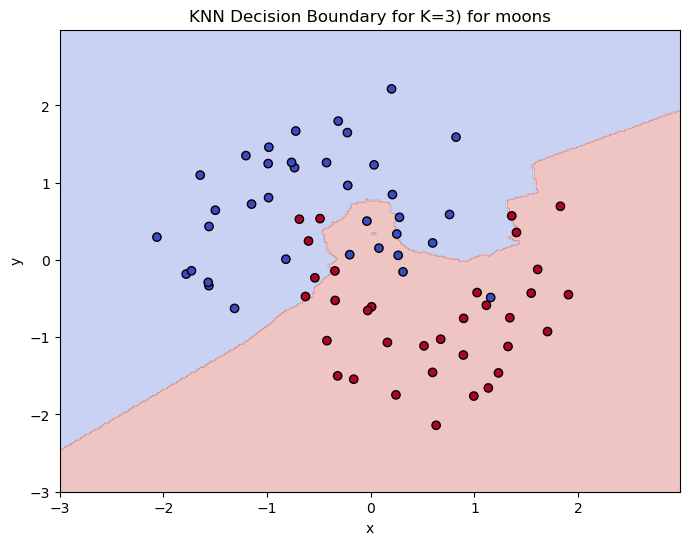

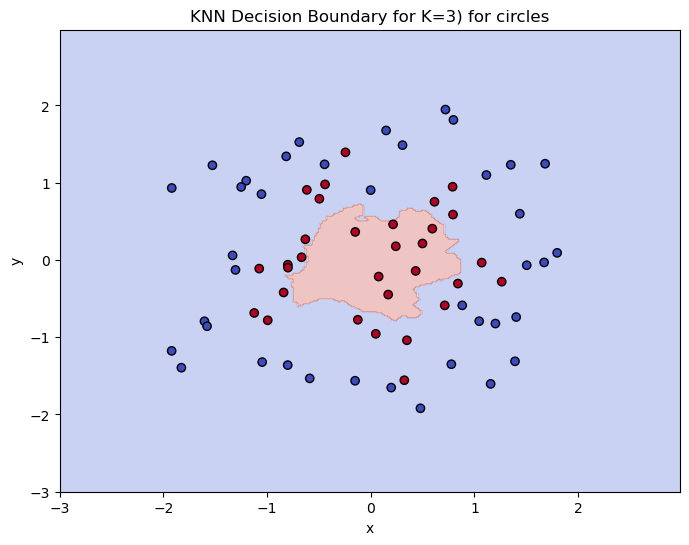

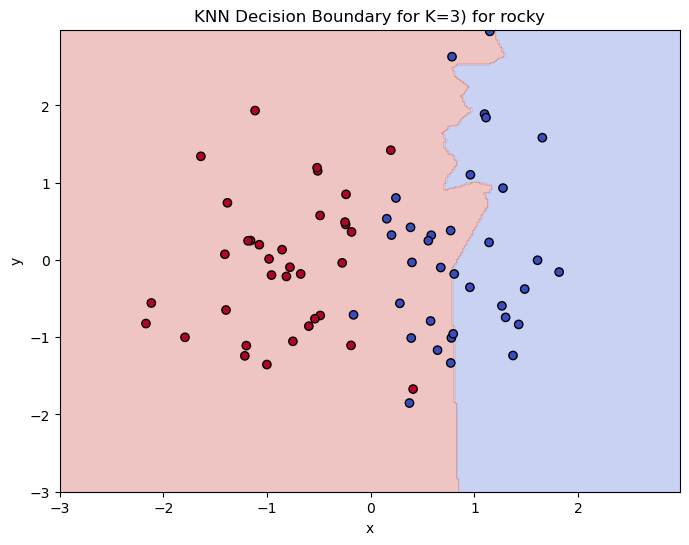

In [17]:

"""

    3. Split the dataset into training and testing sets
    4. Train the transformer on the training set
    5. Fit a KNN model with 3 neighbors on the training dataset using correct aggregation function
    6. Evaluate the model for each point on a 2D grid
    7. Plot the predicted values and on the same plot

"""

# importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# defining parameters for the grid
x_min, x_max, y_min, y_max = -3, 3, -3, 3
step = 0.02

# list of dataframe names
df_names = ["moons", "circles", "rocky"]

# iterating through each data frame from the list
for df, name in zip(df_list, df_names):

    X = df[['x', 'y']].values
    y = df['label'].values

    # performing dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

    # using standard scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # fitting a KNN model
    knn = KNN(k=3, aggregation_function="mode")
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)

    # ! generating the grid
        # np.arange -> creates array of values from min to max
        # np.meshgrid -> takes the 1D arrays and creates 2D coordinate grids
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    # flattens the 2D grids into 1D arrays
        # np.c_[] -> stacks the arrays column wise to form an array of shape 
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # grid points are then scaled
    grid_points_scaled = scaler.transform(grid_points)

    # passes the scaled grid points into KNN model to predict
    grid_pred = knn.predict(grid_points_scaled)

    # convert back into 2D array
    Z = grid_pred.reshape(xx.shape)

    # ! plotting the grid
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"KNN Decision Boundary for K=3) for {name}")
    plt.show()    


## Part III: Choosing a Optimal Value for K
Next, we want to choose a optimal value for k. We load the `sweep.csv` dataset and then evaluate the impact of the k parameter using cross-fold validation. We then repeat the following process for values of k from 1 to 200 in steps of 10:
1. Divide the dataset into 10 folds
2. For each fold, we train the model on the remaining 9 folds and make predictions for the held-out fold
3. Calculate the accuracy of the prdictions for each fold
4. Calculate the average (using numpy.mean) and standard deviation (using numpy.stdev) of the 10 accuracy scores
5. Lastly, we use matplotlib to plot the average and standard deviation (as error bars) for each value of k

In [ ]:

"""

    1. load the fourth dataset which is sweep.csv
    2. divide the dataset into 10 folds, 9 for training, 1 for evaluation
    3. find the accuracy of the predictions for each fold
    4. calculating the average and standard deviation of 


"""

# loading required libraries
from sklearn.model_selection import StratifiedKFold

# loading the sweep dataset
sweep_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/5_week-five/lab/data/sweep.csv")

# initializing whichever is required
k_values = range(1, 201, 10)
splits = 10
folds = StratifiedKFold(n_splits=splits, shuffle=True, random_state = 45)
mean_accuracies = []
std_accuracies = []

X = sweep_df[['x', 'y']].values
y = sweep_df['labels'].values


# for loop through the values of k in the dataset
for k in k_values:

    fold_accuracies = []


    # ! idx here means -> index lists
        # ~ train_idx means positions of samples used for training
        # ~ val_idx means positions of samples used for validation
        
    for train_idx, val_idx in folds.split(X, y):

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # standarize the features
        scaler = StandardScaler()
        X_train_scale = scaler.fit_transform(X_train)
        X_val_scale = scaler.transform(X_val)

        # fititng the KNN
        knn = KNN(k=k, aggregation_function='mode')
        knn.fit(X_train_scale, y_train)

        # prediction
        y_prediction = knn.predict(X_val_scale)

        # computing accuracy
        accuracy = np.mean(y_prediction == y_val)
        fold_accuracies.append(accuracy)


    # finding the accuracy
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)


In [16]:

"""

    finding the best accuracy for the k-value

"""

mean_accuracies = np.array(mean_accuracies)
k_values = np.array(list(k_values))

# the index of the maximum value
best_idx = np.argmax(mean_accuracies)

# accessing best k and accuracy using that index value
best_k = k_values[best_idx]
best_accuracy = mean_accuracies[best_idx]

print(best_k)
print(best_accuracy)

constant_k = k_values[-1]
constant_accuracy = mean_accuracies[-1]

print(constant_k)
print(constant_accuracy)


31
0.8760000000000001
191
0.784


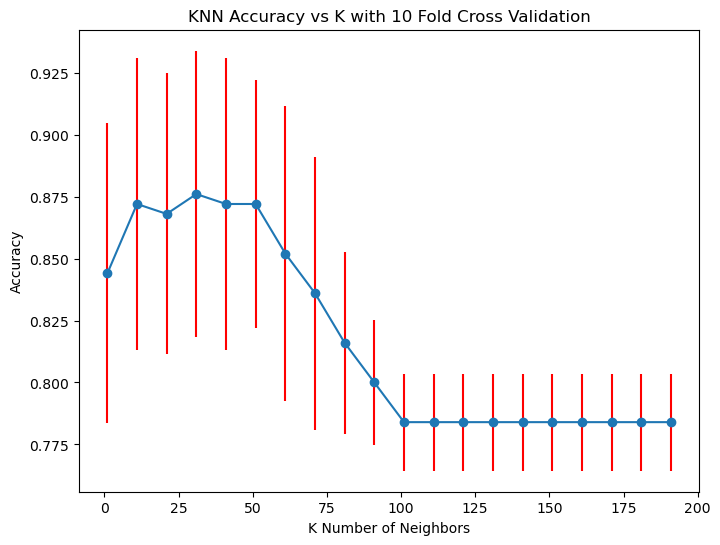

In [ ]:

"""

    5. use matplotlib to plot the average and standard deviation (as error bars) for each value of k

"""


plt.figure(figsize=(8, 6))
plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies, fmt="-o", ecolor='r')
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K with 10 Fold Cross Validation")
plt.show()